In [1]:
import pandas as pd
import json

In [2]:
dfr = pd.read_csv('dicoms.txt', header=None)
dfr.columns = ['filename']
print("TOTAL FRAME COUNT", len(dfr))
dfr.head()

TOTAL FRAME COUNT 17417935


,filename
0,nlst-bucket/manifest-1709246899312/NLST/100002...
1,nlst-bucket/manifest-1709246899312/NLST/100002...
2,nlst-bucket/manifest-1709246899312/NLST/100002...
3,nlst-bucket/manifest-1709246899312/NLST/100002...
4,nlst-bucket/manifest-1709246899312/NLST/100002...


In [3]:
with open('nlst-dirs.json', 'r') as f:
    unique = json.load(f)
dfu = pd.DataFrame({'root': unique})
print("TOTAL UNIQUE SUBDIR COUNT", len(dfu))
dfu.head()

TOTAL UNIQUE SUBDIR COUNT 171275


,root
0,nlst-bucket/manifest-NLST_allCT2/NLST/100002/0...
1,nlst-bucket/manifest-NLST_allCT2/NLST/100002/0...
2,nlst-bucket/manifest-NLST_allCT2/NLST/100004/0...
3,nlst-bucket/manifest-NLST_allCT2/NLST/100004/0...
4,nlst-bucket/manifest-NLST_allCT2/NLST/100005/0...


In [4]:
dfr['root'] = dfr['filename'].apply(lambda x: '/'.join(x.split('/')[:-1]))

In [5]:
df = dfr.merge(dfu)
print("TOTAL UNIQUE FRAME COUNT", len(df))

TOTAL UNIQUE FRAME COUNT 17273745


In [6]:
# count of files by dir
df['one'] = 1
dfc = df[['root', 'one']].groupby('root', as_index=False).sum()
dfc.head()

,root,one
0,nlst-bucket/manifest-1709246899312/NLST/100925...,89
1,nlst-bucket/manifest-NLST_allCT10/NLST/123704/...,59
2,nlst-bucket/manifest-NLST_allCT10/NLST/123704/...,59
3,nlst-bucket/manifest-NLST_allCT10/NLST/123704/...,150
4,nlst-bucket/manifest-NLST_allCT10/NLST/123704/...,3


In [7]:
# Counts of dirs (cnt) by counts of files (one)
dff = dfc[['one']].copy()
dff['cnt'] = 1
dffc = dff.groupby('one', as_index=False).sum()
dffc.head()

,one,cnt
0,1,21736
1,2,33871
2,3,3761
3,4,134
4,5,49


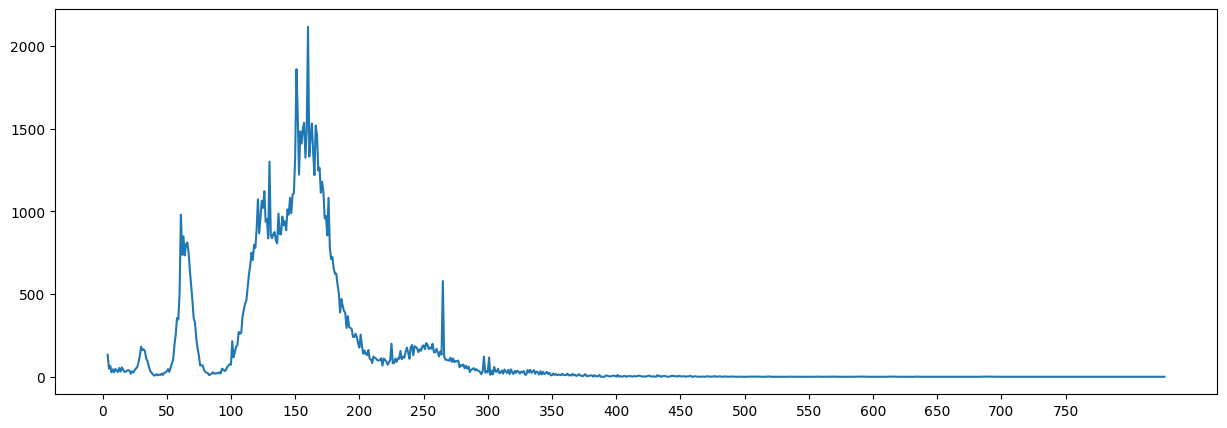

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (15, 5))
plt.xticks(np.arange(0, 800, 50))
dffc4 = dffc[dffc['one'] >= 4]
plt.plot(dffc4['one'], dffc4['cnt'])

In [9]:
THRESH = 96
ratio = round(dffc[dffc.cnt >= THRESH]['cnt'].sum() / dffc[dffc.cnt >= 1]['cnt'].sum(), 3)
print("Preserving", ratio, "of frames")

Preserving 0.961 of frames


In [16]:
dfct = dfc[dfc.one >= THRESH].copy()
dfct.head()
dfct.columns = ['root_dir', 'image_count']
dfct['root_dir'] = dfct['root_dir'].apply(lambda x: '/'.join(x.split('/')[1:]))
dfct.to_csv(f'taken-dirs-{THRESH}.csv', index=False)
dfct.head()

,root_dir,image_count
3,manifest-NLST_allCT10/NLST/123704/01-02-1999-N...,150
8,manifest-NLST_allCT10/NLST/123704/01-02-2000-N...,153
10,manifest-NLST_allCT10/NLST/123704/01-02-2000-N...,153
15,manifest-NLST_allCT10/NLST/123704/01-02-2001-N...,174
17,manifest-NLST_allCT10/NLST/123704/01-02-2001-N...,174


In [11]:
from pprint import pprint
pprint(list(dfct['root_dir'][:4]))

['nlst-bucket/manifest-NLST_allCT10/NLST/123704/01-02-1999-NLST-LSS-55610/5.000000-0OPASESEN16B50f406212060.040.0null-39086',
 'nlst-bucket/manifest-NLST_allCT10/NLST/123704/01-02-2000-NLST-LSS-25506/5.000000-1OPASESEN16B30f378212045.030.0null-73279',
 'nlst-bucket/manifest-NLST_allCT10/NLST/123704/01-02-2000-NLST-LSS-25506/7.000000-1OPASESEN16B50f378212045.030.0null-61855',
 'nlst-bucket/manifest-NLST_allCT10/NLST/123704/01-02-2001-NLST-LSS-34813/5.000000-2OPASESEN16B30f372212045.030.0null-09415']


In [12]:
print("WILL TAKE", len(dfct), "SCANS,", round(len(dfct) / dffc.cnt.sum() * 100), "PERCENTAGE")

WILL TAKE 98233 SCANS, 57 PERCENTAGE
